# Multiple Linear Regression Analysis
Imports and Feature Selection

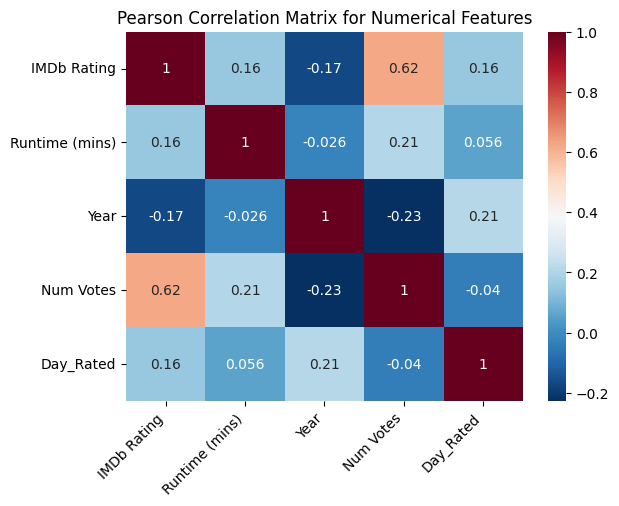

Since there is no correlation between features, greater than 0.7 or less than -0.7. 
No features will be removed


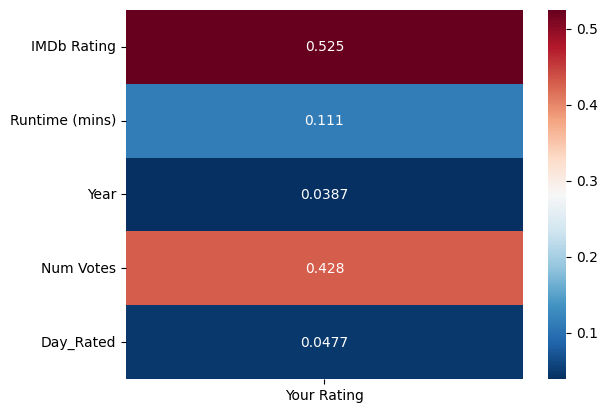

Runtime, Num votes and Day Rated all seem to show very low correlation to my rating. 
So I will try 1 model with thesee values removed and 1 keeping them


In [215]:
from data_cleaning import ratings_df
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler 

#? Filter Methods: Pearson Correlation between features, 
X_num = ratings_df[['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes', 'Day_Rated']]
y = ratings_df["Your Rating"]

corr_matrix = X_num.corr(method='pearson')

# Visualize the correlation matrix using a heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Pearson Correlation Matrix for Numerical Features')
plt.show()
print("Since there is no correlation between features, greater than 0.7 or less than -0.7. \nNo features will be removed")

#? Correlation between featue and target - Especially important since using linear relationship here!
X_y = X_num.copy()
X_y["Your Rating"] = y

corr_matrix = X_y.corr()
corr_target = corr_matrix[['Your Rating']].drop(labels=['Your Rating'])
sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()
print("Runtime, Num votes and Day Rated all seem to show very low correlation to my rating. \nSo I will try 1 model with thesee values removed and 1 keeping them")

## Model Training - For 2 different models


In [216]:
X = ratings_df[['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes', 'Day_Rated']]
X_2 = ratings_df[["IMDb Rating", "Num Votes"]]
y = ratings_df['Your Rating']

#? Model 1 & 2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)



LinearRegression()

## Evaluation

In [217]:
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f'Model 1) \nMean Absolute Error: {round(mae, 3)}')
train_score = model.score(X_train_scaled, y_train)
print(f'Training R-squared: {round(train_score, 3)}')
test_score = model.score(X_test_scaled, y_test)
print(f'Test R-squared: {round(test_score, 3)}', '\n')

print('Model 2) \nMean Absolute Error: 0.927 ')
print('Test R-squared: 0.298')
print('Training R-squared: 0.263', '\n')
print("Despite model 2 demonstrating better point-wise accuracy with lower MAE, \nI would chose model 1 due to it's superior overall explanatory power reflected in higher R-sqaured scores ")
# print(model.coef_)
# print(model.intercept_) 

Model 1) 
Mean Absolute Error: 0.933
Training R-squared: 0.327
Test R-squared: 0.27 

Model 2) 
Mean Absolute Error: 0.927 
Test R-squared: 0.298
Training R-squared: 0.263 

Despite model 2 demonstrating better point-wise accuracy with lower MAE, 
I would chose model 1 due to it's superior overall explanatory power reflected in higher R-sqaured scores 


## Visualisation of predicted vs actual rating

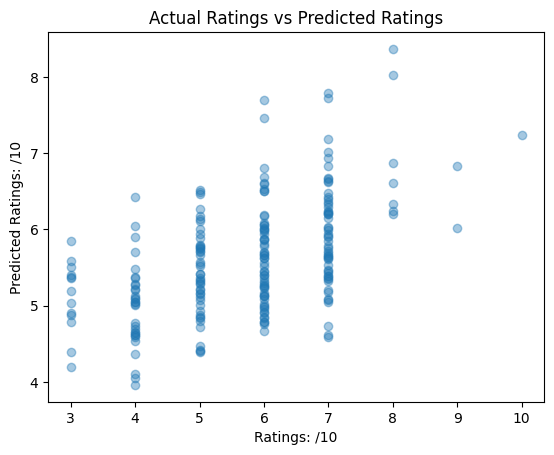

In [218]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Ratings: /10")
plt.ylabel("Predicted Ratings: /10")
plt.title("Actual Ratings vs Predicted Ratings")
plt.show() 

## Visualising the relationships between features and target variable

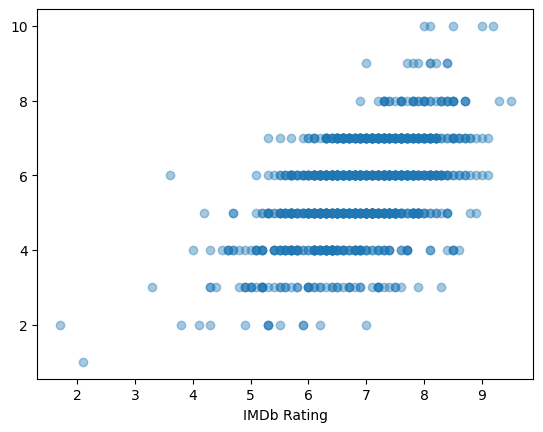

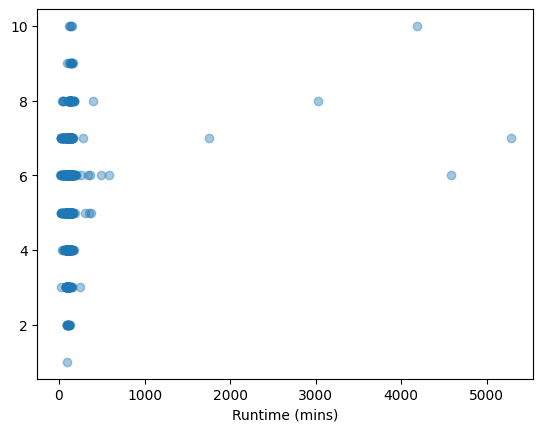

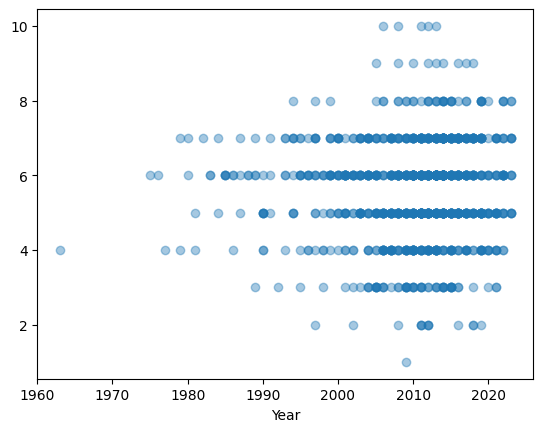

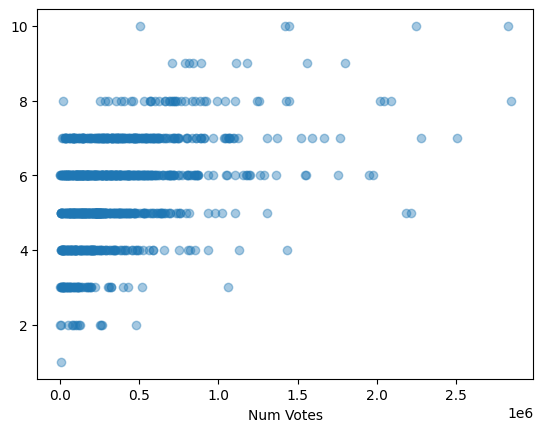

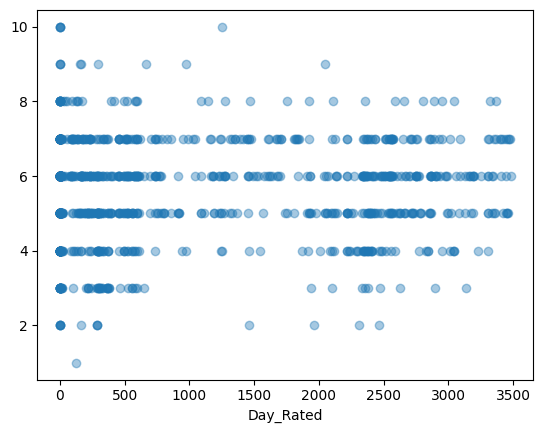

In [219]:
def scatter_loop(df, var_list):
    for variable in var_list:
        plt.scatter(df[[variable]], df["Your Rating"], alpha = 0.4)
        plt.xlabel(variable)
        plt.show()
    return ""

print(scatter_loop(ratings_df, X)) 